In [1]:
from pyod.models.abod import ABOD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Documents/Pulsar-Detection/HTRU2/mini_pulsar.csv')

In [3]:
df.head()


,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1


In [4]:
pulsar = pd.DataFrame(df.drop('class_labels', 1))

In [5]:
pulsar.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920


In [6]:
clf = ABOD(contamination=0.1)

In [7]:
clf.fit(pulsar)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [11]:
df['scores'] = clf.decision_scores_


In [13]:
df['labels'] = clf.labels_

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  5., 15.]),
 array([-2.40389173e-05, -2.16350257e-05, -1.92311342e-05, -1.68272426e-05,
        -1.44233511e-05, -1.20194595e-05, -9.61556800e-06, -7.21167645e-06,
        -4.80778490e-06, -2.40389335e-06, -1.80671389e-12]),
 <a list of 10 Patch objects>)

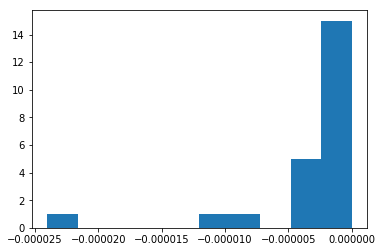

In [18]:
plt.hist(df['scores'])

In [20]:
df[df['class_labels'] == 1]

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores,labels
4,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1,-1.138014e-10,1
10,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1,-2.705921e-06,0
15,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1,-1.138014e-10,1
22,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1,-6.564258e-09,0


In [17]:
#accuracy 
2/4

0.5